In [2]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations.augmentations.functional as F

In [3]:
from util import DataManager



In [4]:
path = DataManager.get_path()
data = DataManager.get_train_data()


In [5]:
image_pth = path + 'train_images/' + data.image_id[0] + '.png'

In [6]:
image_orig = cv2.imread(image_pth)
image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)

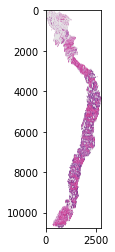

In [6]:
plt.imshow(image_orig)

In [38]:
Image.fromarray(image_orig).save('foo.jpeg', quality=90)

image_1 = Image.open('foo.jpeg')
image_1 = np.array(image_1)

In [32]:
image_2 = F.image_compression(image_orig, quality=90, image_type='.jpg')

In [33]:
np.array_equal(image_1, image_2)

False

In [19]:
Image.fromarray(image_orig).save('foo2.jpeg', quality=90)
image_2 = Image.open('foo2.jpeg').convert("RGB")
#image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)#

In [20]:
np.array_equal(image_2, image_1)

False

In [21]:
for quality in range(80, 101):
    image_3 = F.image_compression(image_orig, image_type='.jpg', quality=quality)
    print(np.array_equal(image_2, image_3))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [30]:
buffer = io.BytesIO()
Image.fromarray(image_orig).save(buffer, format='jpeg', quality=90)
image = cv2.cvtColor(cv2.imread(buffer, 1), cv2.COLOR_BGR2RGB)

SystemError: <built-in function imread> returned NULL without setting an error

In [39]:
def jpeg_compression(image):
    buffer = io.BytesIO()
    Image.fromarray(image).save(buffer, format='jpeg', quality=90)
    image = np.array(Image.open(buffer))
    return image#F.ima

image_4 = jpeg_compression(image_orig)

In [40]:
np.array_equal(image_4, image_1)

True